In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Salaries

In [2]:
df = pd.read_csv(r"salaries.csv")
X = df.drop('salary_more_then_100k',axis=1)
y = df['salary_more_then_100k']
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
# Identifying Categorical columns
#cat_cols = [col for col in X.columns if X[col].dtype == 'object']

#Initialize Label Encoder
le = LabelEncoder()

#Applying Label Encoder
for col in X.columns:
    X[col] = le.fit_transform(X[col])
print(X)

    company  job  degree
0         2    2       0
1         2    2       1
2         2    0       0
3         2    0       1
4         2    1       0
5         2    1       1
6         0    2       1
7         0    1       0
8         0    0       0
9         0    0       1
10        1    2       0
11        1    2       1
12        1    0       0
13        1    0       1
14        1    1       0
15        1    1       1


In [4]:
X_train, X_test, y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [5]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy:\t{acc}")

Accuracy:	0.8


[Text(0.5, 0.875, 'company <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3, 0.625, 'job <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.375, 'degree <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.625, 'company <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.375, 'job <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

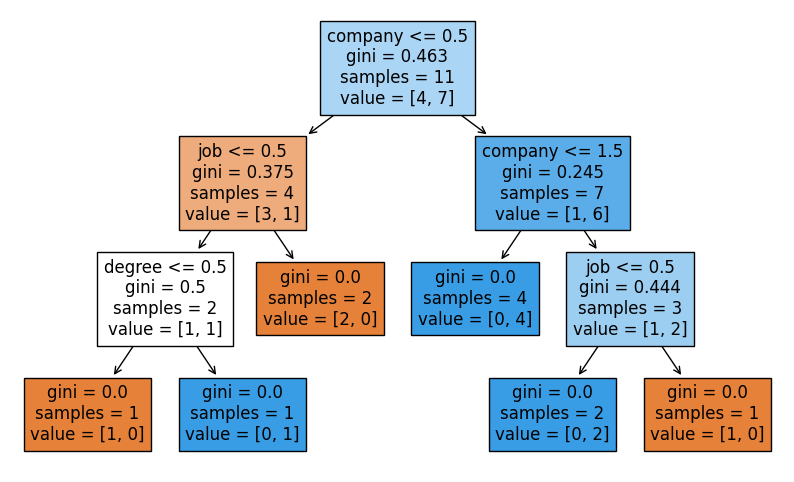

In [7]:
plt.figure(figsize=(10,6))
plot_tree(dt,feature_names=X.columns,filled=True)

## Titanic

In [8]:
df2 = pd.read_csv(r"titanic.csv")
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
X1 = df2.drop(['Survived','PassengerId','Ticket','Fare'],axis=1)
y1 = df2['Survived']

In [10]:
for col in X1.columns:
    X1[col] = le.fit_transform(X1[col])
print(X1)

     Pclass  Name  Sex  Age  SibSp  Parch  Cabin  Embarked
0         2   108    1   28      1      0    147         2
1         0   190    0   51      1      0     81         0
2         2   353    0   34      0      0    147         2
3         0   272    0   47      1      0     55         2
4         2    15    1   47      0      0    147         2
..      ...   ...  ...  ...    ...    ...    ...       ...
886       1   548    1   35      0      0    147         2
887       0   303    0   24      0      0     30         2
888       2   413    0   88      1      2    147         2
889       0    81    1   34      0      0     60         0
890       2   220    1   42      0      0    147         1

[891 rows x 8 columns]


In [11]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=42)

In [12]:
dt.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [13]:
y1_pred = dt.predict(X1_test)

In [14]:
acc2 = accuracy_score(y1_test,y1_pred)
print(f"Accuracy is:\t{acc2}")

Accuracy is:	0.7649253731343284


[Text(0.2901486280487805, 0.975, 'Sex <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.12195121951219512, 0.925, 'Pclass <= 1.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(0.04390243902439024, 0.875, 'Name <= 27.0\ngini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(0.01951219512195122, 0.825, 'Name <= 15.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.00975609756097561, 0.775, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.02926829268292683, 0.775, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06829268292682927, 0.825, 'Name <= 824.5\ngini = 0.037\nsamples = 106\nvalue = [2, 104]'),
 Text(0.04878048780487805, 0.775, 'Age <= 64.5\ngini = 0.021\nsamples = 95\nvalue = [1, 94]'),
 Text(0.03902439024390244, 0.725, 'gini = 0.0\nsamples = 78\nvalue = [0, 78]'),
 Text(0.05853658536585366, 0.725, 'Age <= 66.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.04878048780487805, 0.675, 'Pclass <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 

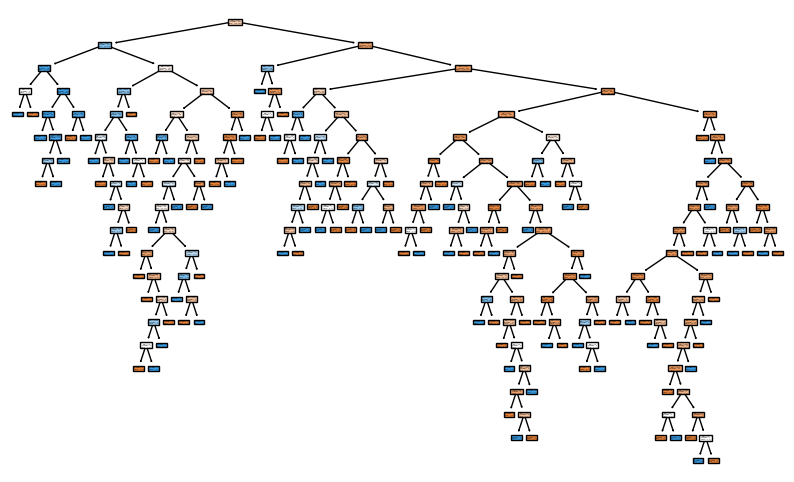

In [15]:
plt.figure(figsize=(10,6))
plot_tree(dt,feature_names=X1.columns,filled=True)